In [2]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json


with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [53]:
rap_urls = []
rap_albums_used = []

rock_urls = []
rock_albums_used = []

country_albums_used = []
country_urls = []

have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:country', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(country_albums_used) == 1000:
            have_enough_pics = True
            break
        if item["album"]["id"] not in country_albums_used:
            country_albums_used.append(item["album"]["id"])
            country_urls.append(item["album"]["images"][1]["url"])


have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:rap', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(rap_albums_used) == 1000:
            have_enough_pics = True
            break
        if item["album"]["id"] not in rap_albums_used:
            rap_albums_used.append(item["album"]["id"])
            rap_urls.append(item["album"]["images"][1]["url"])


have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:rock', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(rock_albums_used) == 1000:
            have_enough_pics = True
            break
        if item["album"]["id"] not in rock_albums_used:
            rock_albums_used.append(item["album"]["id"])
            rock_urls.append(item["album"]["images"][1]["url"])
            


In [54]:
print(len(country_albums_used))
print(len(country_urls))

print(len(rap_albums_used))
print(len(rap_urls))

print(len(rock_albums_used))
print(len(rock_urls))

624
624
587
587
779
779


In [55]:
from fastdownload import download_url
from fastai.vision.all import *
genres = ["country", "rap", "rock"]
path = Path("album_imgs")

dest = (path/genres[0])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=country_urls)

dest = (path/genres[1])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=rap_urls)

dest = (path/genres[2])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=rock_urls)

In [56]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [57]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=500)

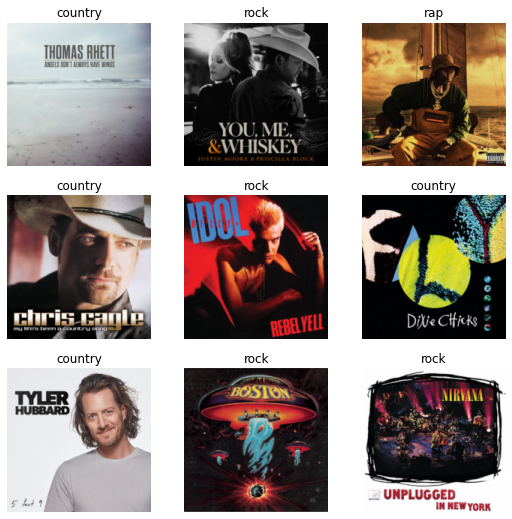

In [58]:
dls.show_batch()

In [59]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

z:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
z:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.save()